In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'
plt.rc('figure', figsize=(12, 8))

In [5]:
# Data reading:
raw_data = pd.read_csv('../input/punching-shear-of-flat-concrete-slabs/Punching Shear Clean.csv')
df = raw_data.copy()
df

,Shape,b1 (mm),d1 (mm),davg (mm),ravg,b* (mm),b*/davg,fc (MPa),fy (MPa),Pu (kN)
0,C,51,NaN,38.100,0.020138,39.898227,1.047198,13.145888,550,24
1,S,76,NaN,29.972,0.017700,76.200000,2.542373,26.332005,396,31
2,C,102,NaN,38.100,0.020138,79.796453,2.094395,13.145888,550,33
3,S,76,NaN,31.750,0.009800,76.200000,2.400000,28.008869,332,34
4,C,102,NaN,38.100,0.020138,79.796453,2.094395,13.145888,550,34
...,...,...,...,...,...,...,...,...,...,...
412,S,200,NaN,275.000,0.014875,200.000000,0.727273,83.490750,550,2250
413,S,200,NaN,275.000,0.025500,200.000000,0.727273,89.675250,550,2400
414,S,200,NaN,275.000,0.014875,200.000000,0.727273,111.720000,550,2450
415,S,300,NaN,500.000,0.007576,300.000000,0.600000,37.430000,433,2681


In [6]:
# Drop rows where ravg = 0 (not useful for the problem):
index = df[df['ravg'] == 0].index
df.drop(index, inplace=True)
df.shape

(373, 10)

In [8]:
df.tail(10)

,Shape,b1 (mm),d1 (mm),davg (mm),ravg,b* (mm),b*/davg,fc (MPa),fy (MPa),Pu (kN)
407,S,300,NaN,473.0,0.006006,300.000000,0.634249,13.05000,270,1659
408,C,500,NaN,240.0,0.013090,392.699082,1.636246,26.17500,544,1662
409,S,200,NaN,275.0,0.014875,200.000000,0.727273,64.13925,550,2050
410,S,520,NaN,456.0,0.003266,520.000000,1.140351,32.40000,520,2153
411,S,300,NaN,400.0,0.007576,300.000000,0.750000,37.43000,433,2224
412,S,200,NaN,275.0,0.014875,200.000000,0.727273,83.49075,550,2250
413,S,200,NaN,275.0,0.025500,200.000000,0.727273,89.67525,550,2400
414,S,200,NaN,275.0,0.014875,200.000000,0.727273,111.72000,550,2450
415,S,300,NaN,500.0,0.007576,300.000000,0.600000,37.43000,433,2681
416,C,800,NaN,668.5,0.005661,628.318531,0.939893,28.65000,622,4915


In [9]:
df.reset_index(inplace=True)

In [10]:
df = df.drop(labels=['index'], axis=1)
colunas = {'b1 (mm)':r'$b_1 (mm)$', 'd1 (mm)':r'$d_1 (mm)$', 'davg (mm)':r'$d_{avg}$', 'ravg':r'$\rho_{avg}$',
           'b* (mm)':r'$b^*$', 'b*/davg':r'$b^*/d_{avg}$', 'fc (MPa)':r'$f_c$', 'fy (MPa)':r'$f_y$', 'Pu (kN)':r'$P_u$'}
df = df.rename(columns=colunas)

df

,Shape,$b_1 (mm)$,$d_1 (mm)$,$d_{avg}$,$\rho_{avg}$,$b^*$,$b^*/d_{avg}$,$f_c$,$f_y$,$P_u$
0,C,51,NaN,38.100,0.020138,39.898227,1.047198,13.145888,550,24
1,S,76,NaN,29.972,0.017700,76.200000,2.542373,26.332005,396,31
2,C,102,NaN,38.100,0.020138,79.796453,2.094395,13.145888,550,33
3,S,76,NaN,31.750,0.009800,76.200000,2.400000,28.008869,332,34
4,C,102,NaN,38.100,0.020138,79.796453,2.094395,13.145888,550,34
...,...,...,...,...,...,...,...,...,...,...
368,S,200,NaN,275.000,0.014875,200.000000,0.727273,83.490750,550,2250
369,S,200,NaN,275.000,0.025500,200.000000,0.727273,89.675250,550,2400
370,S,200,NaN,275.000,0.014875,200.000000,0.727273,111.720000,550,2450
371,S,300,NaN,500.000,0.007576,300.000000,0.600000,37.430000,433,2681


In [11]:
# New feature - C (perimeter of the column):
perim = []
for i in range(len(df)):
    if df['Shape'][i] == 'S':
        C = 4 * df[r'$b_1 (mm)$'][i]
    elif df['Shape'][i] == 'R':
        C = 2 * (pd.to_numeric(df[r'$b_1 (mm)$'][i], downcast='float') +
                 pd.to_numeric(df[r'$d_1 (mm)$'][i], downcast='float'))
    elif df['Shape'][i] == 'C':
        C = pi * df[r'$b_1 (mm)$'][i]
    C = float(C)
    perim.append(C)

perim = pd.DataFrame({r'$C$':perim})
df = pd.concat([df, perim], axis=1)
df # C is basically 4 times b* and I figured it out after doing this, but I'll leave this feature here for now

,Shape,$b_1 (mm)$,$d_1 (mm)$,$d_{avg}$,$\rho_{avg}$,$b^*$,$b^*/d_{avg}$,$f_c$,$f_y$,$P_u$,$C$
0,C,51,NaN,38.100,0.020138,39.898227,1.047198,13.145888,550,24,160.221225
1,S,76,NaN,29.972,0.017700,76.200000,2.542373,26.332005,396,31,304.000000
2,C,102,NaN,38.100,0.020138,79.796453,2.094395,13.145888,550,33,320.442451
3,S,76,NaN,31.750,0.009800,76.200000,2.400000,28.008869,332,34,304.000000
4,C,102,NaN,38.100,0.020138,79.796453,2.094395,13.145888,550,34,320.442451
...,...,...,...,...,...,...,...,...,...,...,...
368,S,200,NaN,275.000,0.014875,200.000000,0.727273,83.490750,550,2250,800.000000
369,S,200,NaN,275.000,0.025500,200.000000,0.727273,89.675250,550,2400,800.000000
370,S,200,NaN,275.000,0.014875,200.000000,0.727273,111.720000,550,2450,800.000000
371,S,300,NaN,500.000,0.007576,300.000000,0.600000,37.430000,433,2681,1200.000000


In [12]:
# New feature - fy * ravg (both are properties related to the steel reinforcement and this might be useful):
s = []
for i in range(len(df)):
    S = df[r'$\rho_{avg}$'][i] * df[r'$f_y$'][i]
    s.append(S)

s = pd.DataFrame({r'$f_y * \rho_{avg}$':s})
df = pd.concat([df, s], axis=1)
df

,Shape,$b_1 (mm)$,$d_1 (mm)$,$d_{avg}$,$\rho_{avg}$,$b^*$,$b^*/d_{avg}$,$f_c$,$f_y$,$P_u$,$C$,$f_y * \rho_{avg}$
0,C,51,NaN,38.100,0.020138,39.898227,1.047198,13.145888,550,24,160.221225,11.076128
1,S,76,NaN,29.972,0.017700,76.200000,2.542373,26.332005,396,31,304.000000,7.009200
2,C,102,NaN,38.100,0.020138,79.796453,2.094395,13.145888,550,33,320.442451,11.076128
3,S,76,NaN,31.750,0.009800,76.200000,2.400000,28.008869,332,34,304.000000,3.253600
4,C,102,NaN,38.100,0.020138,79.796453,2.094395,13.145888,550,34,320.442451,11.076128
...,...,...,...,...,...,...,...,...,...,...,...,...
368,S,200,NaN,275.000,0.014875,200.000000,0.727273,83.490750,550,2250,800.000000,8.181231
369,S,200,NaN,275.000,0.025500,200.000000,0.727273,89.675250,550,2400,800.000000,14.024967
370,S,200,NaN,275.000,0.014875,200.000000,0.727273,111.720000,550,2450,800.000000,8.181231
371,S,300,NaN,500.000,0.007576,300.000000,0.600000,37.430000,433,2681,1200.000000,3.280303


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


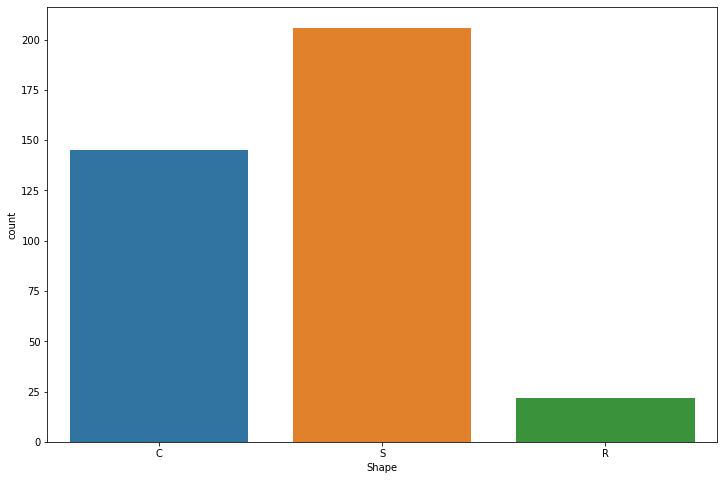

['$b_1 (mm)$',
 '$d_1 (mm)$',
 '$d_{avg}$',
 '$\\rho_{avg}$',
 '$b^*$',
 '$b^*/d_{avg}$',
 '$f_c$',
 '$f_y$',
 '$P_u$',
 '$C$',
 '$f_y * \\rho_{avg}$',
 'Shape_C',
 'Shape_R',
 'Shape_S']

In [13]:
# One-hot encoding for 'Shape':
sns.countplot(df['Shape'])
plt.show()
y = pd.get_dummies(df['Shape'], prefix='Shape')

# Concatenate, drop and reorder:
df = pd.concat([df, y], axis=1)
df = df.drop(columns='Shape')
cols = df.columns.tolist()
cols

In [14]:
reorder = cols[-1:-4:-1] + cols[:8] + cols[-4:-6:-1] + cols[8:9]
df = df[reorder]
df

,Shape_S,Shape_R,Shape_C,$b_1 (mm)$,$d_1 (mm)$,$d_{avg}$,$\rho_{avg}$,$b^*$,$b^*/d_{avg}$,$f_c$,$f_y$,$f_y * \rho_{avg}$,$C$,$P_u$
0,0,0,1,51,NaN,38.100,0.020138,39.898227,1.047198,13.145888,550,11.076128,160.221225,24
1,1,0,0,76,NaN,29.972,0.017700,76.200000,2.542373,26.332005,396,7.009200,304.000000,31
2,0,0,1,102,NaN,38.100,0.020138,79.796453,2.094395,13.145888,550,11.076128,320.442451,33
3,1,0,0,76,NaN,31.750,0.009800,76.200000,2.400000,28.008869,332,3.253600,304.000000,34
4,0,0,1,102,NaN,38.100,0.020138,79.796453,2.094395,13.145888,550,11.076128,320.442451,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,1,0,0,200,NaN,275.000,0.014875,200.000000,0.727273,83.490750,550,8.181231,800.000000,2250
369,1,0,0,200,NaN,275.000,0.025500,200.000000,0.727273,89.675250,550,14.024967,800.000000,2400
370,1,0,0,200,NaN,275.000,0.014875,200.000000,0.727273,111.720000,550,8.181231,800.000000,2450
371,1,0,0,300,NaN,500.000,0.007576,300.000000,0.600000,37.430000,433,3.280303,1200.000000,2681


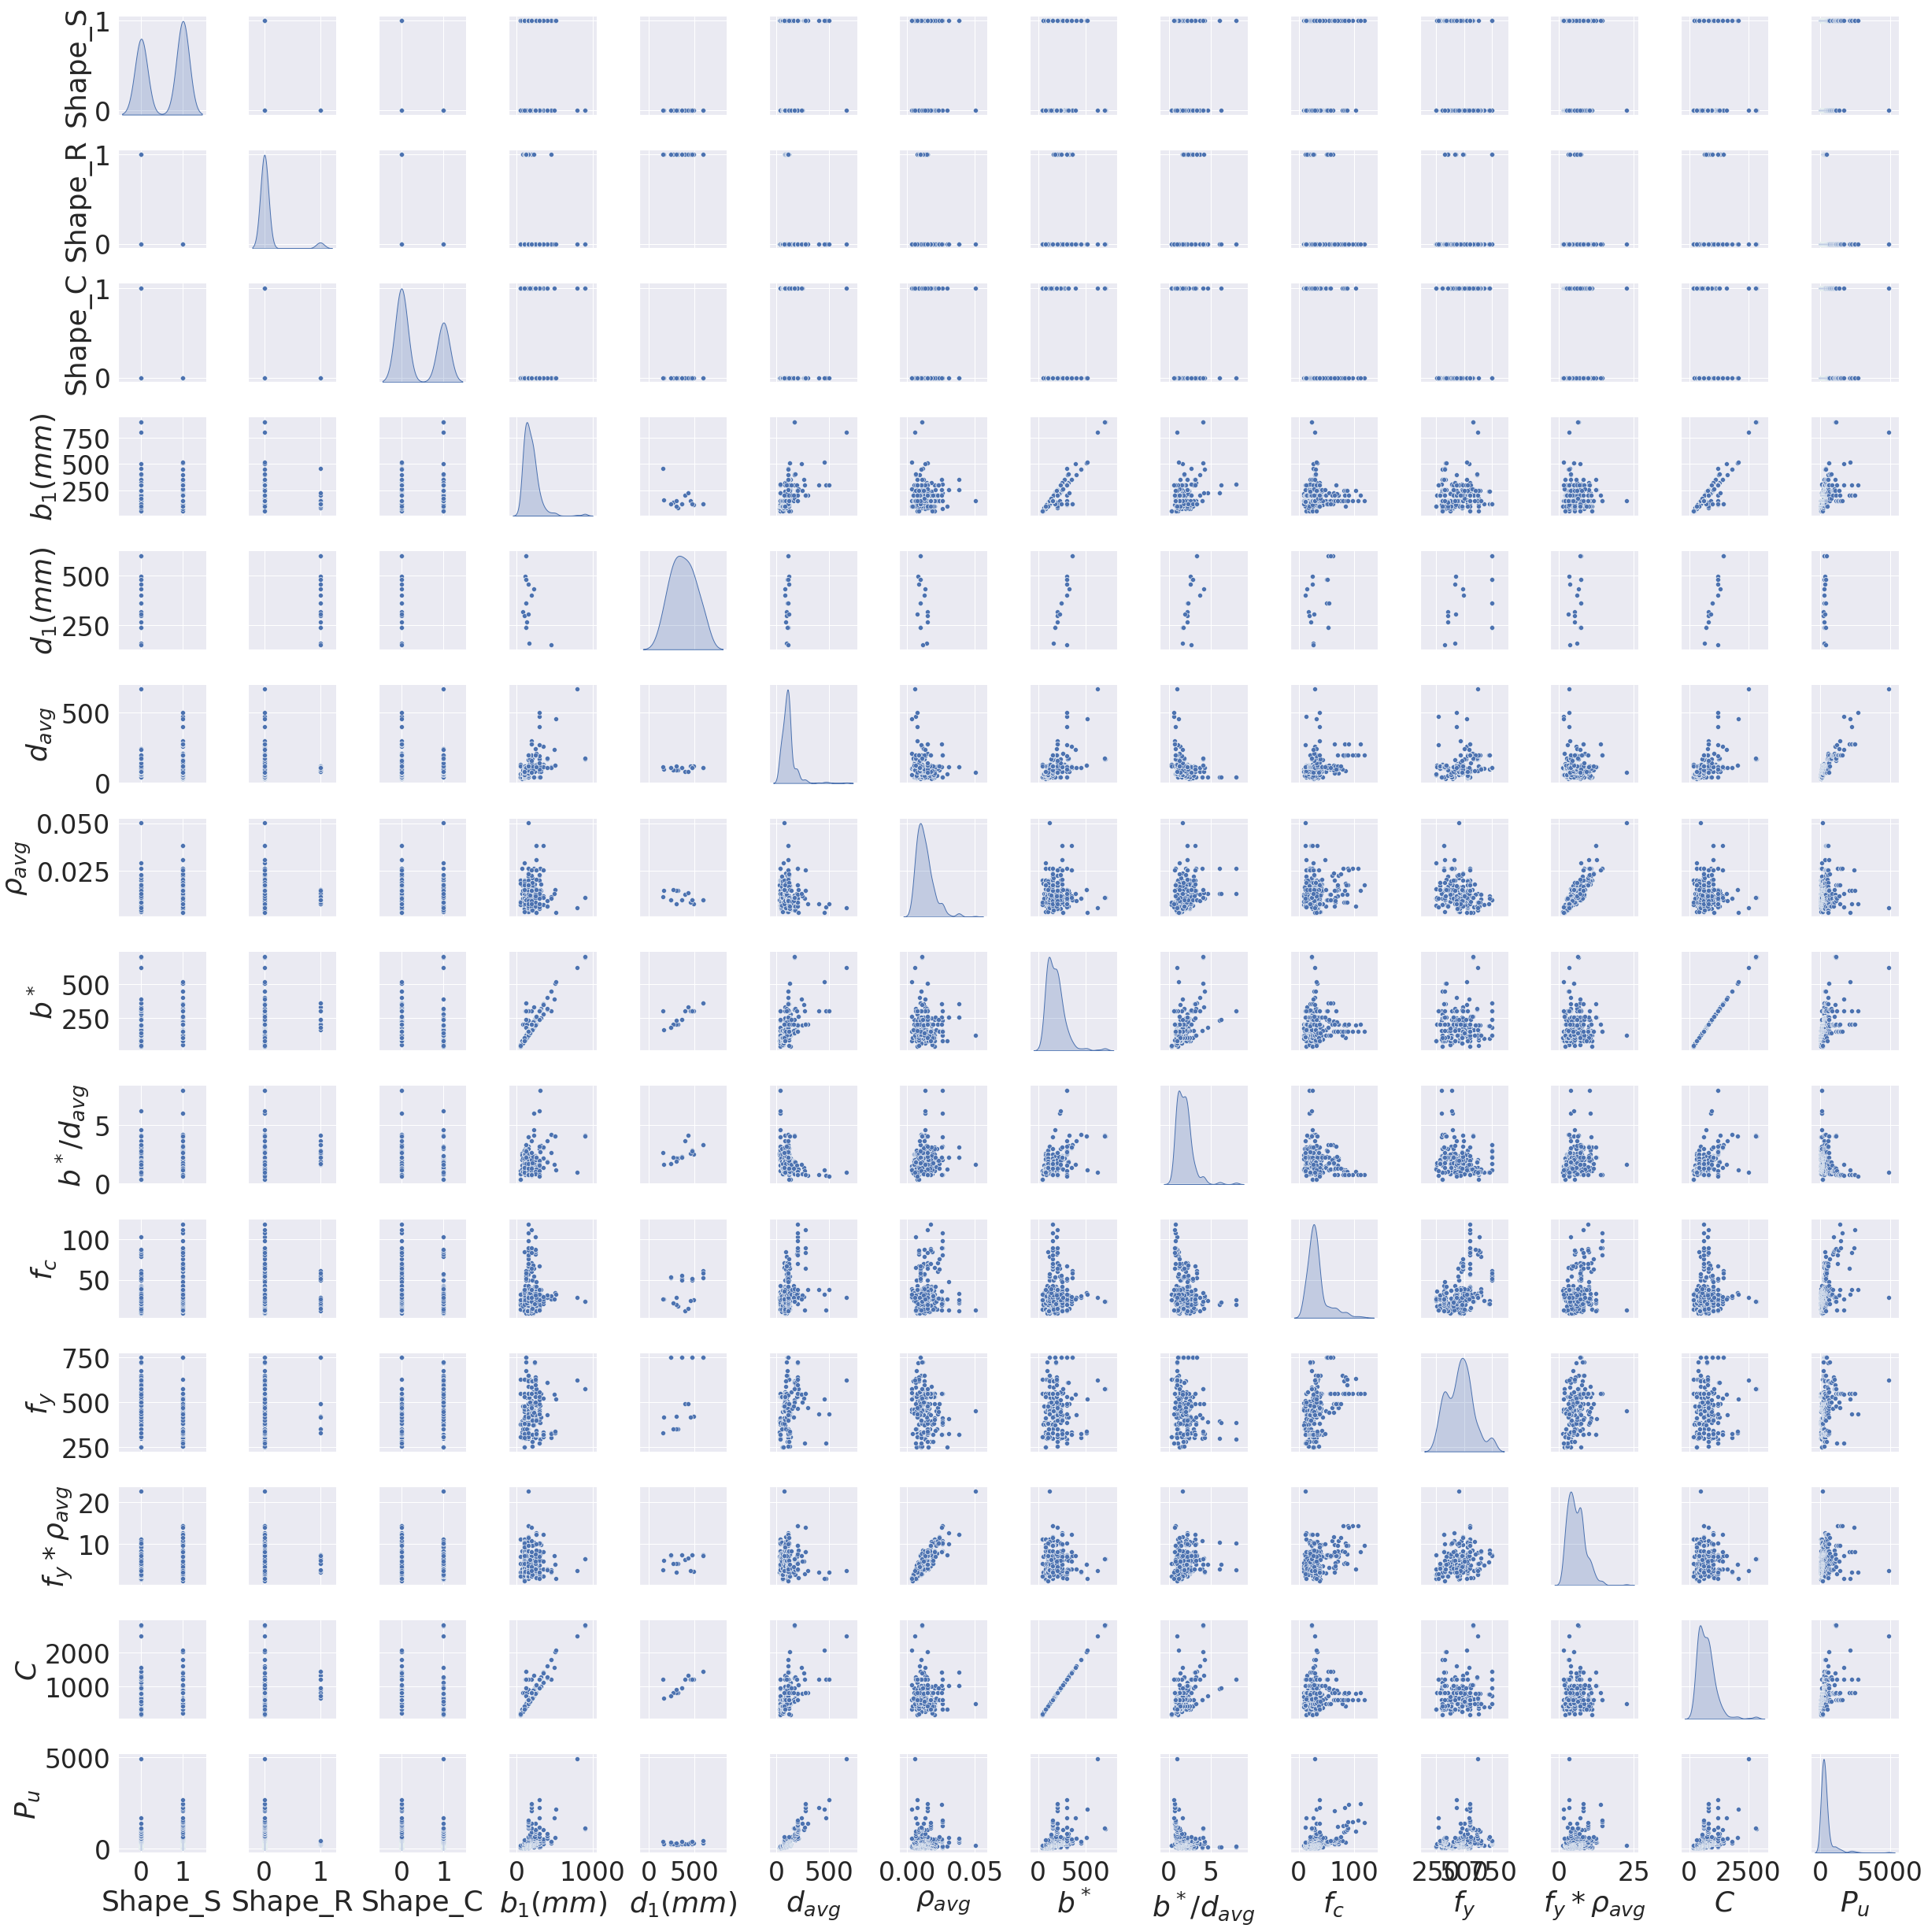

In [15]:
# Scatter plots:
sns.set(font_scale=3)
sns.pairplot(df, diag_kind='kde')

<AxesSubplot:>

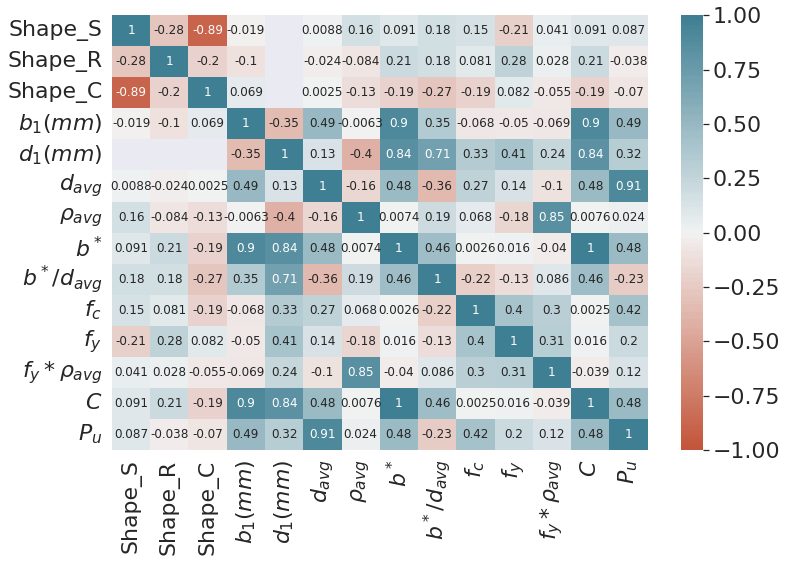

In [16]:
# Correlation:
sns.set(font_scale=2)
corr = df.corr()
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200), annot=True, annot_kws={'fontsize':12})

In [17]:
# Drop features:
to_drop = [
    'Shape_S',
    'Shape_R',
    'Shape_C',
    r'$b_1 (mm)$',
    r'$d_1 (mm)$',
    #r'$d_{avg}$',
    #r'$\rho_{avg}$',
    #r'$b^*$',
    r'$b^*/d_{avg}$',
    #r'$f_c$',
    #r'$f_y$',
    r'$f_y * \rho_{avg}$',
    r'$C$',
           ]

df_prep = df.drop(to_drop, axis=1)

# Export .csv:
df_prep.to_csv('Dataset_prep.csv')
df_prep

,$d_{avg}$,$\rho_{avg}$,$b^*$,$f_c$,$f_y$,$P_u$
0,38.100,0.020138,39.898227,13.145888,550,24
1,29.972,0.017700,76.200000,26.332005,396,31
2,38.100,0.020138,79.796453,13.145888,550,33
3,31.750,0.009800,76.200000,28.008869,332,34
4,38.100,0.020138,79.796453,13.145888,550,34
...,...,...,...,...,...,...
368,275.000,0.014875,200.000000,83.490750,550,2250
369,275.000,0.025500,200.000000,89.675250,550,2400
370,275.000,0.014875,200.000000,111.720000,550,2450
371,500.000,0.007576,300.000000,37.430000,433,2681


At the end I chose to keep only these features after running several tests.

Data scaling should be performed after the train-test split so I didn't do it here.

Please leave a comment if you have any suggestions.

In [18]:
X = df_prep.iloc[:, :-1]
y = df_prep.iloc[:, -1]
y.tail(10)

363    1659
364    1662
365    2050
366    2153
367    2224
368    2250
369    2400
370    2450
371    2681
372    4915
Name: $P_u$, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,
                                                   )

In [22]:
print(X_train.shape)
print(X_test.shape)

(298, 5)
(75, 5)


In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'C': [0.1, 1, 10, 100, 1000],
              'gamma': ['scale', 'auto']}

# Create a GridSearchCV object
svr = SVR()
grid = GridSearchCV(svr, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid.fit(X_train, y_train)

# Get the best model
best_svr = grid.best_estimator_

# Use the best model to predict on the training and testing sets
y_pred_train = best_svr.predict(X_train)
y_pred_test = best_svr.predict(X_test)

# Evaluate the performance of the best model on the training and testing sets
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print('Training Mean squared error: {:.2f}'.format(mse_train))
print('Testing Mean squared error: {:.2f}'.format(mse_test))

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("Training R-squared value:", r2_train)
print("Testing R-squared value:", r2_test)


In [41]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Fit regression model
svr = SVR(kernel='linear', C=1e3)
svr.fit(X_train, y_train)
y_pred_train = svr.predict(X_train)
y_pred_test = svr.predict(X_test)
#y_pred = svr.fit(X, y).predict(X)

# Evaluate the model on the training and testing sets
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print('Training Mean squared error: {:.2f}'.format(mse_train))
print('Testing Mean squared error: {:.2f}'.format(mse_test))

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("Training R-squared value:", r2_train)
print("Testing R-squared value:", r2_test)

# Evaluate the model
#mse = mean_squared_error(y, y_pred)
#print('Mean squared error: {:.2f}'.format(mse))

# Calculate R-squared value
#r2 = r2_score(y, y_pred)
#print("R-squared value:", r2)



Training Mean squared error: 26953.98
Testing Mean squared error: 63911.86
Training R-squared value: 0.8495730213974677
Testing R-squared value: 0.8064532221054087


In [23]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression(max_iter=10000,  solver='saga')

In [29]:
lr.fit(X_train, y_train)


LogisticRegression(max_iter=10000, solver='saga')

In [30]:
y_pred = lr.predict(X_test)


In [34]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_pred, y_test)
print(conf_matrix)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 score:", f1_score(y_test, y_pred, average='weighted'))



Accuracy: 0.0
Precision: 0.0
Recall: 0.0
F1 score: 0.0


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
